In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_question(column_name):
    """
    Get the question id from a column name

    Example: "A01[SQ003]" returns "A01"
    """
    return column_name.split("[")[0]

In [3]:
def get_reponse(column_name):
    """
    Get the response id from a column name

    Example: "A01[SQ003]" returns "SQ003"
    """
    return column_name.split("[")[1].strip("]")

In [4]:
def merge_multiple_choice(row, column_names):
    """
    Merge multiple choice values from multiple columns

    Pass this function to df.apply() to run it on each row of the DataFrame.

    If none of the values are "Ja", return the value of the last column.
    """
    data = dict(row[column_names])
    for key, value in data.items():
        if value == "Ja":
            return get_reponse(key)
    return data[column_names[-1]]

## Loading the Excel file
**Warning**: If you try to run this for the first time, you should get a `ModuleNotFoundError` and an `ImportError` claiming that the optional dependency `openpyxl` is missing. Use either `pip` or `conda` to install the package from the miniconda terminal. Go back to the miniconda installation notebook if you do not remember the commands.

Pandas has a function that allows you to directly load an Excel file into a data frame. 

In [5]:
# read the excel file into a data frame with the function "pd.read_excel()"
df = pd.read_excel("raw_data_after_certification_complete_nocontacts_23-10-16.xlsx")

In [6]:
df.columns

Index(['id', 'A01[SQ003]', 'A01[SQ004]', 'A01[SQ006]', 'A01[SQ005]',
       'A01[SQ008]', 'A01[SQ007]', 'A01[other]', 'A02[SQ001]', 'A02[SQ002]',
       'A03[SQ001]', 'A03[SQ002]', 'A03[SQ003]', 'A04[SQ001]', 'A05[SQ001]',
       'B01', 'B002a', 'B002b', 'B02[SQ002]', 'B02[SQ004]', 'B02[SQ001]',
       'B02[SQ005]', 'B02[SQ006]', 'B05a[SQ002]', 'B05a[SQ004]', 'B05a[SQ001]',
       'B05a[SQ003]', 'B05b[SQ003]', 'B05b[SQ001]', 'B05b[SQ002]',
       'B05c[SQ002]', 'B05c[SQ004]', 'B05c[SQ005]', 'B05c[SQ001]',
       'B05c[SQ003]', 'B05d[SQ004]', 'B05d[SQ001]', 'B05d[SQ003]',
       'B42[SQ001]', 'B42[SQ002]', 'B42[SQ003]', 'B42[SQ004]', 'B42[other]',
       'B07[SQ002]', 'B07[SQ001]', 'B07[SQ003]', 'B07[SQ004]', 'B07[SQ005]',
       'B07[SQ006]', 'B07[other]', 'B04[SQ001]', 'B04[SQ002]', 'B04[SQ003]',
       'B04[SQ004]', 'B04[other]', 'B03', 'B03[comment]', 'B08a[SQ001]',
       'B08a[SQ004]', 'B08a[SQ002]', 'B08a[SQ003]', 'B08a[SQ005]',
       'B08b[SQ001]', 'B08b[SQ004]', 'B08b[SQ002]',

### Merging multiple choice columns into one
For a multiple choice question each possible answer is stored in a separate column. To get a better overview it makes a lot of sense to merge these columns into one single column. The merged value should be the name of the column where the response was `'Ja'`. If there is some "other" option, this can be the default value if none of the responses are equal to `'Ja'`.

In [7]:
# select all columns corresponding to question A01
columns_A01 = [col for col in df.columns if col.startswith("A01")]
columns_A01

['A01[SQ003]',
 'A01[SQ004]',
 'A01[SQ006]',
 'A01[SQ005]',
 'A01[SQ008]',
 'A01[SQ007]',
 'A01[other]']

In [8]:
# create the series by applying the merge function
A01 = df.apply(merge_multiple_choice, axis=1, args=(columns_A01,))

In [9]:
# insert the series as a new column in the DataFrame
df.insert(loc=1, column="A01", value=A01)

In [10]:
# drop the old columns starting with "A01"
df.drop(labels=columns_A01, axis=1, inplace=True)

## Counting 

In [11]:
columns_A03 = [col for col in df.columns if col.startswith("A03")]
columns_A03

['A03[SQ001]', 'A03[SQ002]', 'A03[SQ003]']

In [12]:
# compute value counts for all columns at once: https://stackoverflow.com/a/32589877
df_A03 = df.query("B01 == 'LEAF'")[columns_A03].apply(pd.Series.value_counts).fillna(0).convert_dtypes()

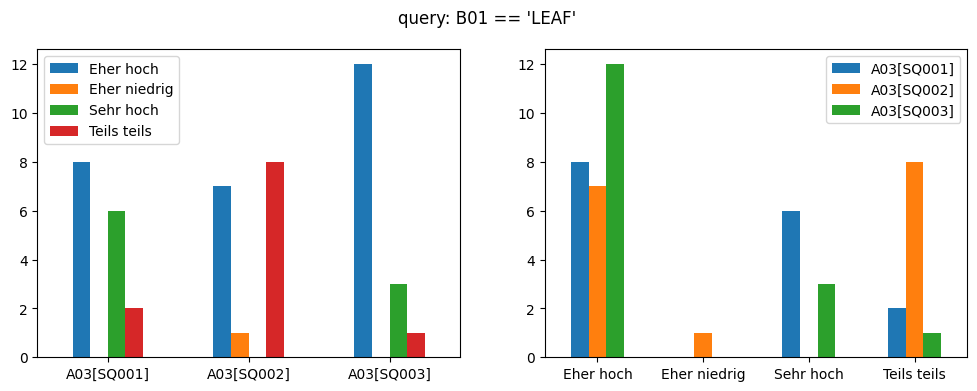

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
df_A03.T.plot(kind="bar", ax=axs[0])
df_A03.plot(kind="bar", ax=axs[1])
# rotate xlabels https://stackoverflow.com/a/56139690
for ax in axs:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=0, ha='center')
fig.suptitle("query: B01 == 'LEAF'")
fig.savefig("A03.png")

In [14]:
columns_B02 = [col for col in df.columns if col.startswith("B02")]
columns_B02

['B02[SQ002]', 'B02[SQ004]', 'B02[SQ001]', 'B02[SQ005]', 'B02[SQ006]']

In [15]:
df_B02 = df.query("B01 == 'LEAF'")[columns_B02].apply(pd.Series.value_counts).fillna(0).convert_dtypes()

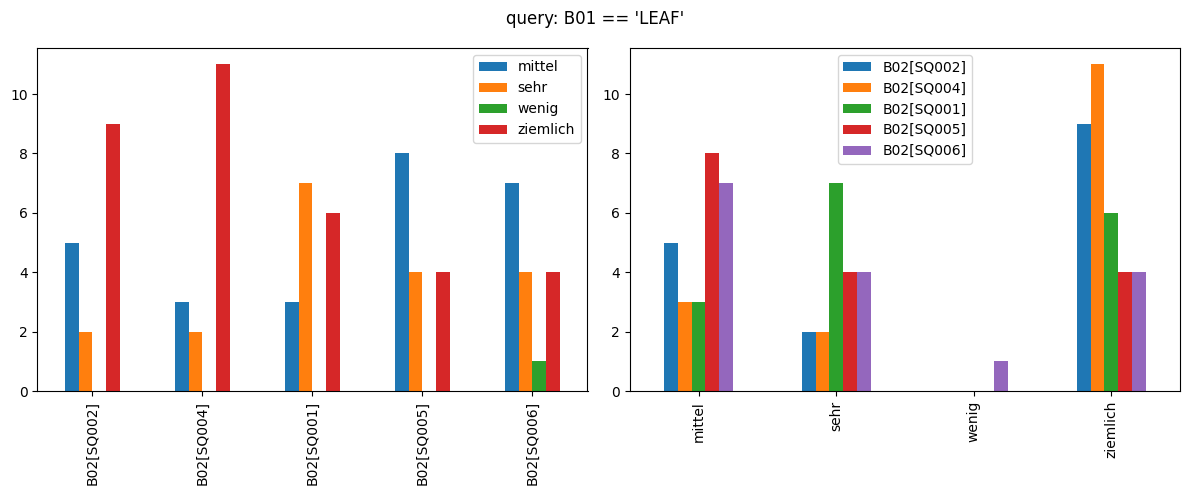

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# https://stackoverflow.com/a/67391843
fig.set_tight_layout(True)
df_B02.T.plot(kind="bar", ax=axs[0])
df_B02.plot(kind="bar", ax=axs[1])
fig.suptitle("query: B01 == 'LEAF'")
fig.savefig("B02.png")